# Importing Necessary Libraries

In this section, we will import all the necessary libraries and read the csv file.

In [76]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors


import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import missingno 


import numpy as np
from scipy import stats
import scipy.cluster.hierarchy as shc

%matplotlib inline

In [77]:
X = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FDA/Project 1/World Indicators.csv")
#X.head()
X['Region'].unique()

array(['Africa', 'Asia', 'Europe', 'Middle East', 'Oceania',
       'The Americas'], dtype=object)

# Data Pre-Processing

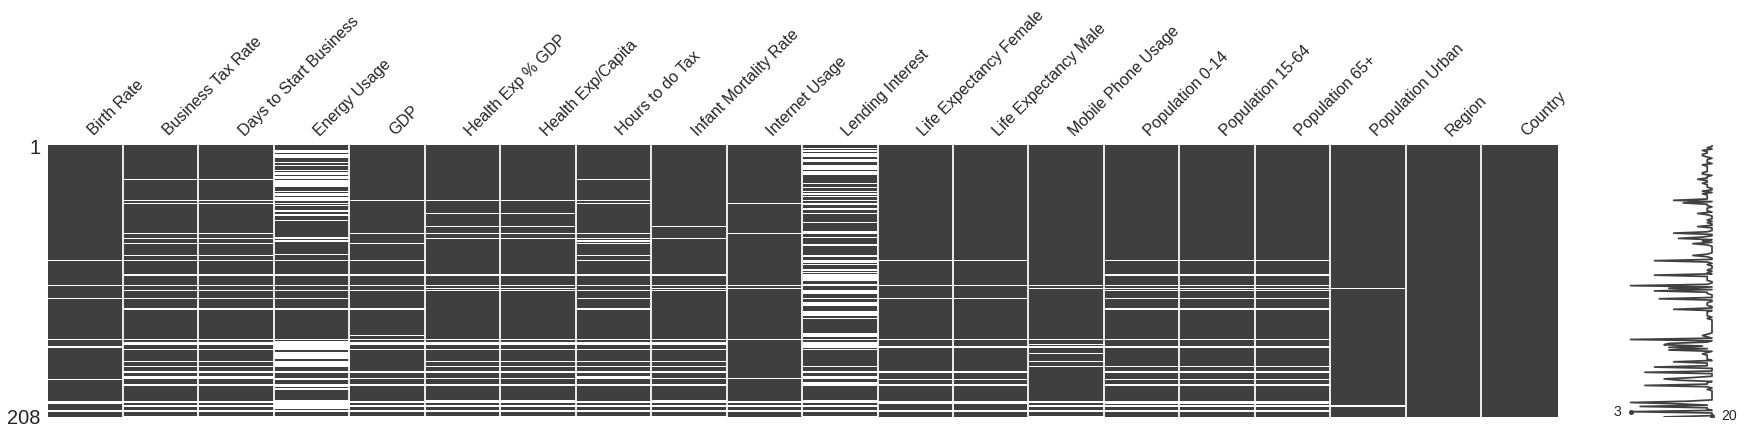

In [78]:
missingno.matrix(X, figsize = (30,5)) #To check for missing values

In [79]:
def missing_value(df): #Function to show percentage of missing values in dataframe
  X = df
  percent_missing = X.isnull().sum() * 100 / len(X)
  missing_value_df = pd.DataFrame({'column': X.columns,
                                 'pct_missing': percent_missing})
  missing_value_df.sort_values(by = 'pct_missing', ascending = False, inplace = True)
  return missing_value_df

In [80]:
 missing_value(X)

,column,pct_missing
Lending Interest,Lending Interest,37.019231
Energy Usage,Energy Usage,34.615385
Hours to do Tax,Hours to do Tax,13.461538
Days to Start Business,Days to Start Business,12.980769
Business Tax Rate,Business Tax Rate,12.980769
Health Exp % GDP,Health Exp % GDP,11.057692
Health Exp/Capita,Health Exp/Capita,11.057692
GDP,GDP,9.615385
Infant Mortality Rate,Infant Mortality Rate,9.615385
Population 15-64,Population 15-64,8.173077


**Delete all columns above 30% missing value**

In [81]:
X.drop(['Energy Usage', 'Lending Interest', ], axis=1, inplace= True)

**Remove special characters like '$' and '%' from individual records and convert string to float.**

In [82]:
X['Business Tax Rate'] = pd.to_numeric(X['Business Tax Rate'].replace({'%':''}, regex=True))

X['GDP'] = X['GDP'].str.slice(start=1)
X['GDP'] = X['GDP'].replace({',':''}, regex=True).astype(float)


X['Health Exp/Capita'] = X['Health Exp/Capita'].str.slice(start=1)
X['Health Exp/Capita'] = X['Health Exp/Capita'].replace({',':''}, regex=True).astype(float)

X.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

**To encode categorical columns so that clustering algorithm can work properly.**

In [83]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
X['Region']=X[['Region']].apply(encoder1.fit_transform)
X['Country']=X[['Country']].apply(encoder2.fit_transform)

In [84]:
X

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,0,2
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,0,5
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,0,20
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,0,25
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,5,193
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,5,198
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,5,199
206,0.020,62.8,141.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,5,202


**Here we impute values based on 'Region' group using median of the sample.**

In [85]:
for i in X[:-2].columns:
  X[i] = X[i].fillna(X.groupby('Region')[i].transform('median'))
  

In [86]:
missing_value(X)

,column,pct_missing
Birth Rate,Birth Rate,0.0
Business Tax Rate,Business Tax Rate,0.0
Region,Region,0.0
Population Urban,Population Urban,0.0
Population 65+,Population 65+,0.0
Population 15-64,Population 15-64,0.0
Population 0-14,Population 0-14,0.0
Mobile Phone Usage,Mobile Phone Usage,0.0
Life Expectancy Male,Life Expectancy Male,0.0
Life Expectancy Female,Life Expectancy Female,0.0


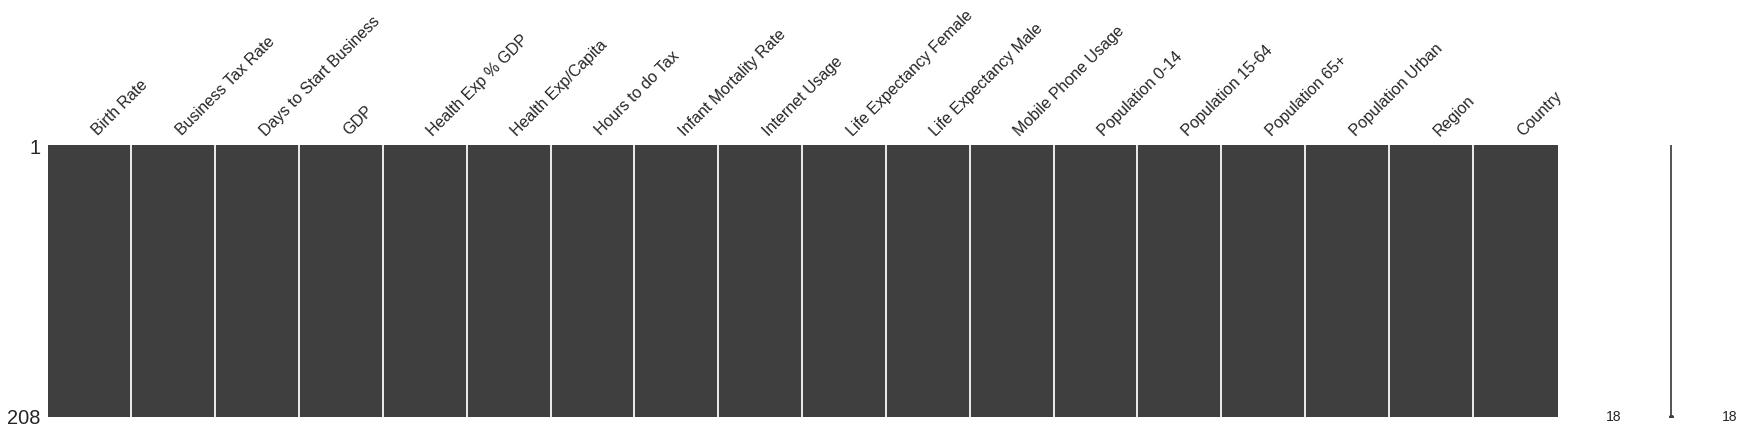

In [87]:
missingno.matrix(X, figsize = (30,5)) #To check for missing values

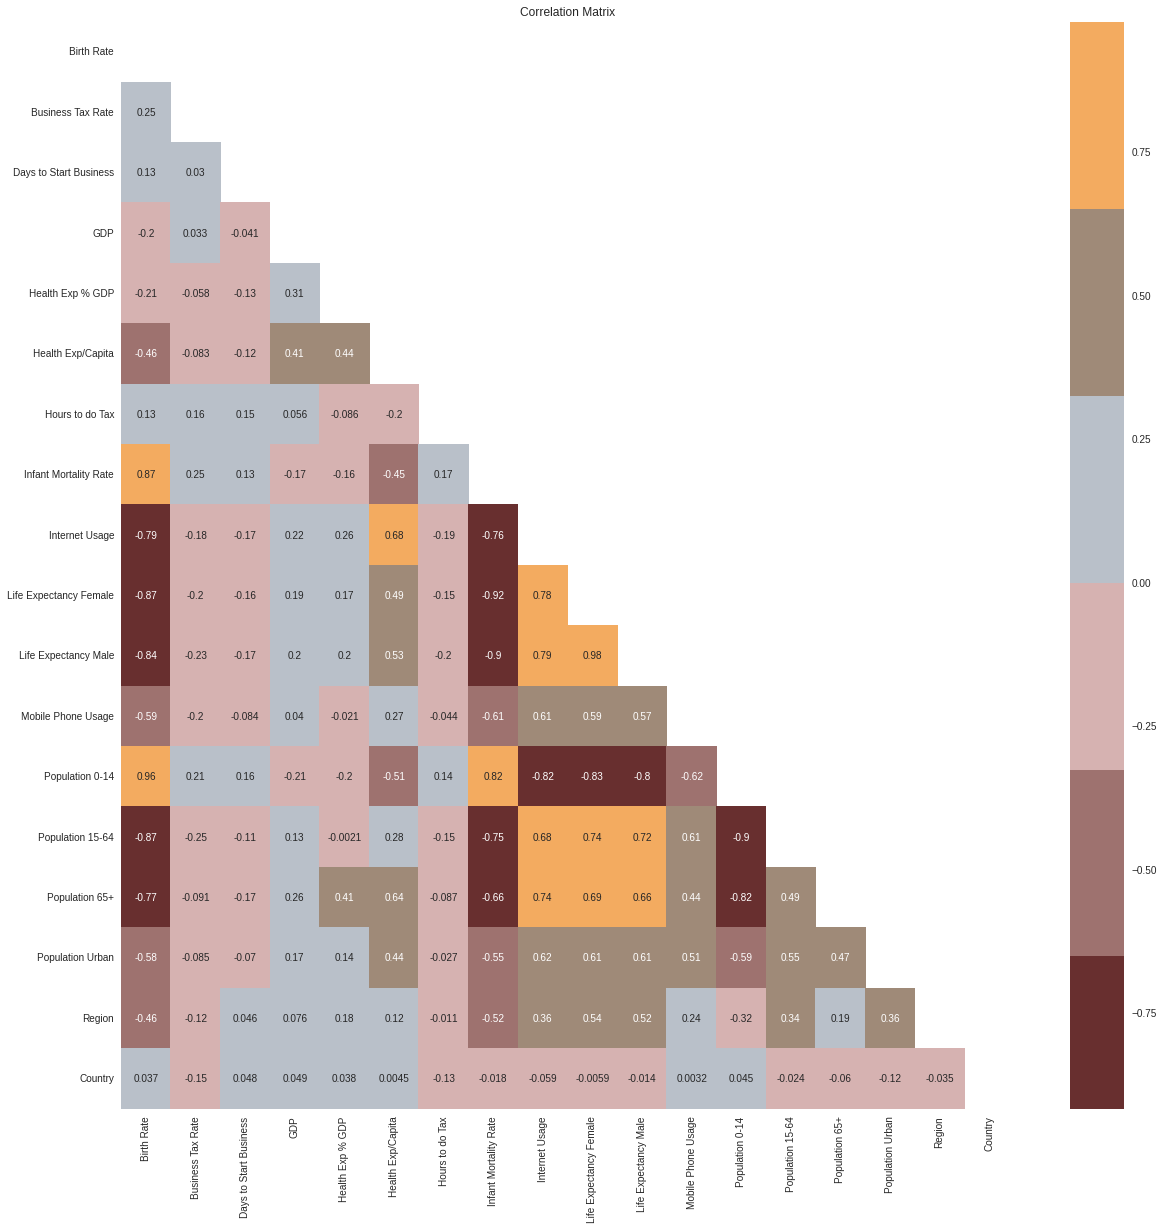

In [88]:
#To plot lower correlation matrix
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat=X.corr()
mask = np.triu(np.ones_like(X.corr()))
plt.figure(figsize=(20,20))
plt.title("Correlation Matrix")
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0, mask=mask)

In [89]:
X1 = X.copy()


**Let's check for outliers in the dataframe**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13170e8e50>,
      dtype=object)

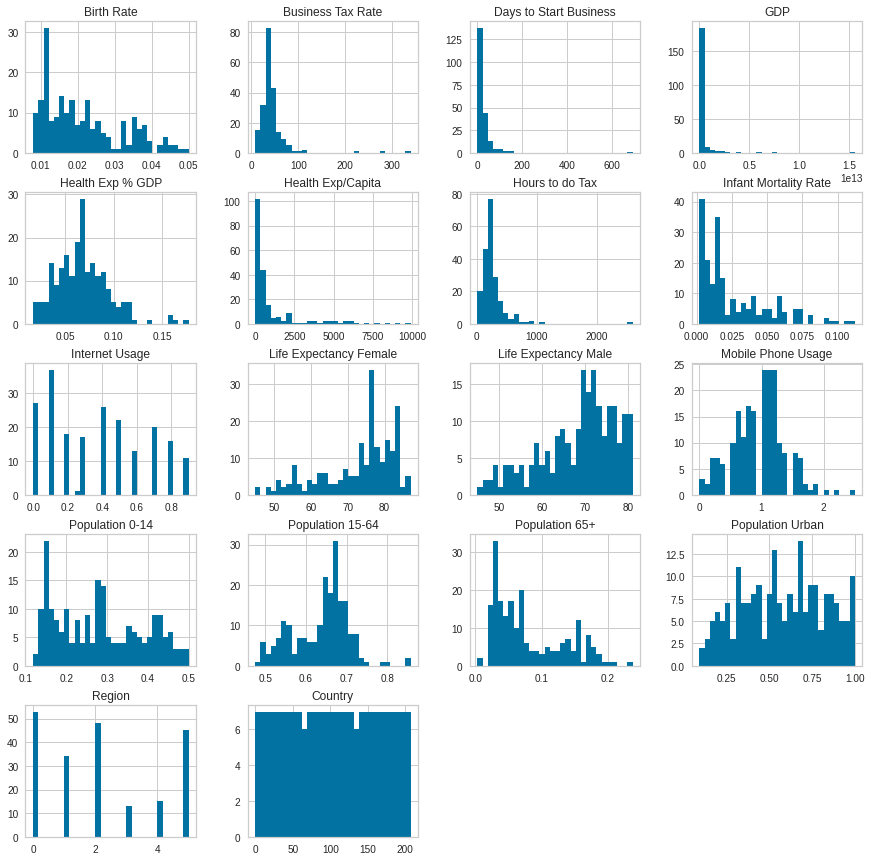

In [90]:
X1.hist(bins=30, figsize=(15, 15)) #Before removing outliers

**Now, we shall remove outliers from the dataframe, as we saw there are a couple of them, using Z-Score.**

In [91]:
X1 = X1[(np.abs(stats.zscore(X1)) < 3).all(axis=1)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f131651c190>,
      dtype=object)

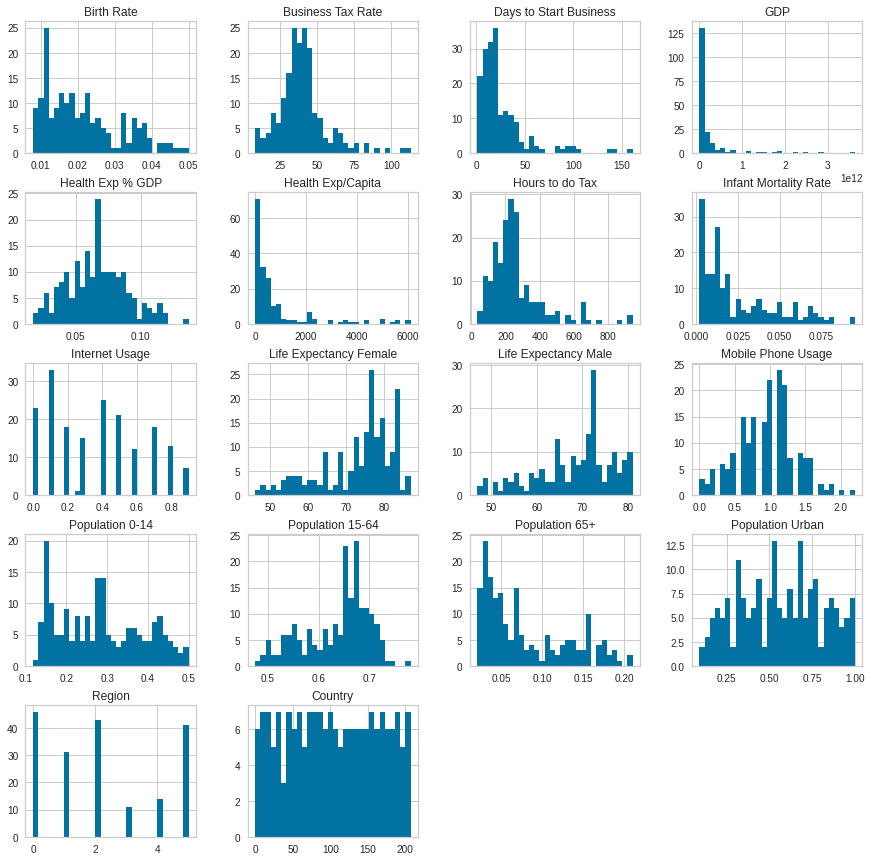

In [92]:
X1.hist(bins=30, figsize=(15, 15)) #After removing outliers

In [93]:
X1.head()
X2 = X1.copy()

# Scaling all variables

In [94]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
'''list1 = ['Birth Rate', 'Business Tax Rate', 'Days to Start Business', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Urban', 'Region', 'Country']'''
'''reg_cnt = X1[['Region', 'Country']]
reg_cnt['Region_S'] = scaler.fit_transform(X1['Region'])
reg_cnt['Country_S'] = scaler.fit_transform(X1['Country'])'''

for i in X1.columns:
  X1[[i]] = scaler.fit_transform(X1[[i]])

X1.shape

(186, 18)

# Defining functions for Clustering

In [95]:
def Aclustering(df,no_clusters): #Function to perform Agglormerative Clustering
  df1 = df
  AC = AgglomerativeClustering(n_clusters = no_clusters)
  pred_label = AC.fit_predict(df1)
  df1['kmeans_result'] = pred_label
  return df1

In [96]:
def Kclustering(df,no_clusters): #Function to perform KMeans Clustering
  df1 = df
  kmeans = KMeans(n_clusters = no_clusters)
  pred_label = kmeans.fit_predict(df1)
  df1['kmeans_result'] = pred_label
  return df1

## KMeans Clustering
First we will try to find the ideal number of clusters using elbow method.

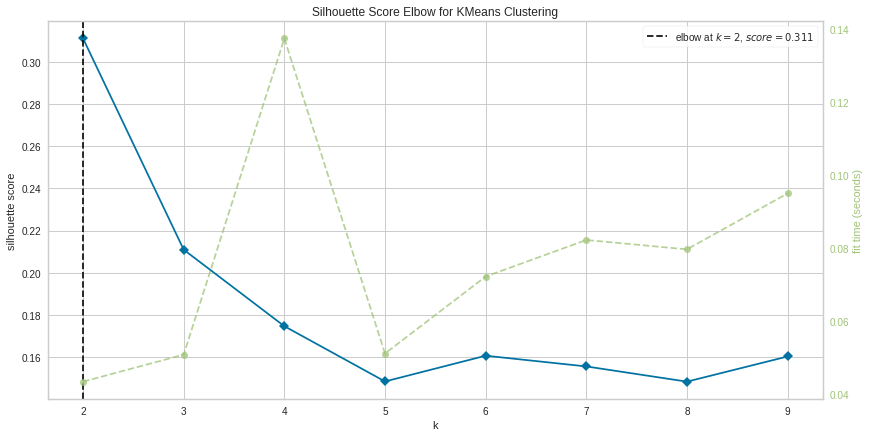

In [97]:
# Silhouette Score for K means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True,size=(1000, 500))
visualizer.fit(X1)      
visualizer.show()        

In [98]:
X_clust = Kclustering(X1,2)

### KMeans Evaluation

Here, we use Silhouette Co-efficient and Davis Bouldin Score to evaluate our model.

In [99]:
k = metrics.silhouette_score(X_clust, X_clust['kmeans_result'], metric='euclidean')
print("Silhouette Co-efficient: " + str(round(k,2)))
dunn = metrics.davies_bouldin_score(X_clust, X_clust['kmeans_result'])
print("Davis Bouldin Score: " + str(round(k,2)))

Silhouette Co-efficient: 0.32
Davis Bouldin Score: 0.32


## Hierarchial Clustering

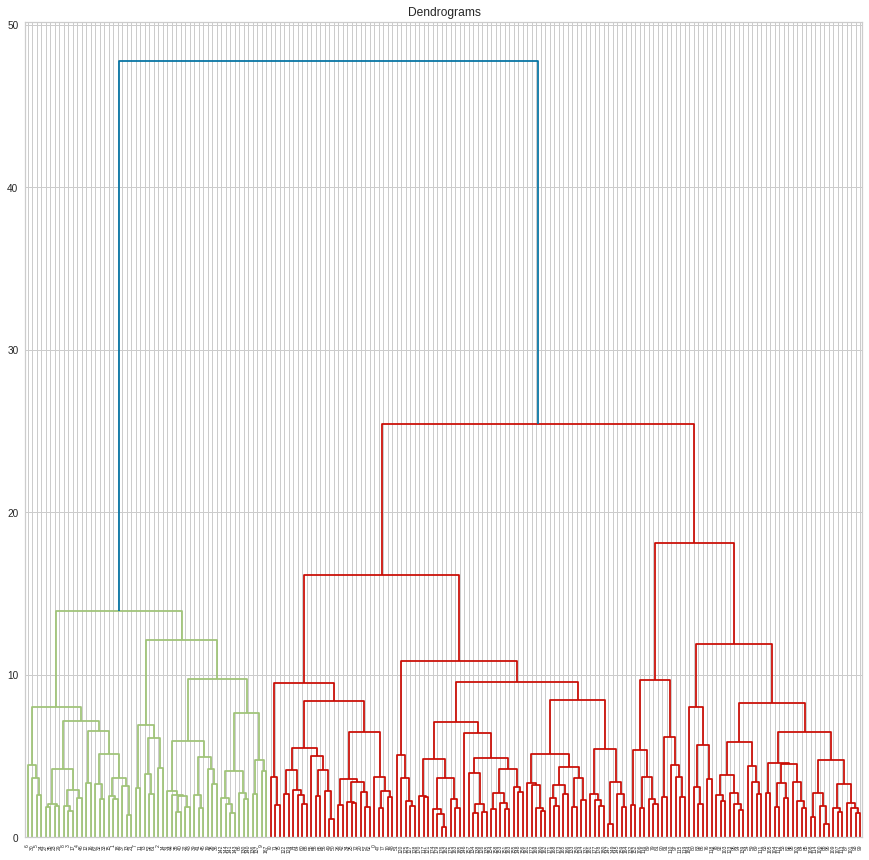

In [100]:
plt.figure(figsize=(15, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_clust, method='ward'))

In [101]:
X_clust = Aclustering(X1,2)

### Hierarchial Evaluation

Here, we use Silhouette Co-efficient and Davis Bouldin Score to evaluate our model.

In [102]:
k = metrics.silhouette_score(X_clust, X_clust['kmeans_result'], metric='euclidean')
print("Silhouette Co-efficient: " + str(round(k,2)))
dunn = metrics.davies_bouldin_score(X_clust, X_clust['kmeans_result'])
print("Davis Bouldin Score: " + str(round(k,2)))

Silhouette Co-efficient: 0.32
Davis Bouldin Score: 0.32


In [103]:
def viz(df,colx,coly):
  X_clust = df
  X_clust["kmeans_result"] = X_clust["kmeans_result"].astype(str)
  fig = px.scatter(X_clust, x=colx, y=coly, color="kmeans_result")

  fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
    title = colx + " VS. "+ coly,
    legend_title= "Cluster Groups"
  )
  fig.show()

# Mapping Country and Region back


In [104]:


X_clust.rename(columns={"Region": "Region_T", "Country": "Country_T"}, inplace=True)
X_clust = pd.concat([X_clust, X2[['Region','Country']]], axis=1)


X_clust['Region'] = encoder1.inverse_transform(X_clust['Region'])
X_clust['Country'] = encoder2.inverse_transform(X_clust['Country'])

X_clust

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,...,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region_T,Country_T,kmeans_result,Region,Country
0,0.346347,1.918603,-0.013849,-0.016642,-0.954396,-0.465095,1.203231,-0.094715,-0.998630,-0.124604,...,-0.144329,-0.108989,0.694104,-0.633333,0.484727,-1.188611,-1.698728,0,Africa,Algeria
2,1.519406,1.549085,0.143460,-0.397888,-0.911142,-0.616114,0.051242,1.561769,-1.369749,-1.388768,...,-0.388377,1.442928,-1.525349,-0.984276,-0.585915,-1.188611,-1.398699,1,Africa,Benin
3,0.248592,-1.261672,1.362608,-0.381989,-0.608358,-0.335324,-0.699779,0.621603,-0.998630,-2.863626,...,1.319955,0.550576,-0.181173,-0.867295,0.001078,-1.188611,-1.315358,1,Africa,Botswana
4,2.008181,0.192168,-0.485777,-0.391724,-0.089300,-0.612320,0.051242,1.919927,-1.369749,-1.810156,...,-1.120519,1.695115,-1.869208,-1.062263,-1.239048,-1.188611,-1.248685,1,Africa,Burkina Faso
5,2.301445,0.682839,-0.485777,-0.407707,1.035325,-0.625980,0.076700,1.516999,-1.369749,-1.915503,...,-1.852661,1.520524,-1.587869,-1.062263,-1.883913,-1.188611,-1.232017,1,Africa,Burundi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.631203,-0.680136,0.615388,-0.365322,-0.565103,0.067647,-0.330633,-0.229024,0.856966,-0.019257,...,1.075908,-0.739455,1.116113,0.107547,-1.966588,1.500947,1.418235,0,The Americas,Trinidad and Tobago
203,-0.435693,0.052842,-0.249813,-0.365052,0.083719,-0.272336,-0.107873,-0.497643,0.114728,0.402131,...,0.099718,-0.108989,0.225206,-0.184906,1.414821,1.500947,1.484908,0,The Americas,Turks and Caicos Islands
205,-0.631203,0.095245,-0.721741,-0.318485,0.948815,0.278619,0.471304,-0.676722,0.485847,0.718172,...,1.075908,-0.584263,0.022016,1.160376,1.576037,1.500947,1.584918,0,The Americas,Uruguay
206,-0.142428,1.361298,4.548123,0.216769,-0.911142,-0.272336,3.831804,-0.497643,0.114728,0.402131,...,0.099718,0.075301,0.225206,-0.418868,1.336280,1.500947,1.634923,0,The Americas,"Venezuela, RB"


In [105]:
cl_1 = X_clust[X_clust['kmeans_result'] == 0] #cluster 1 dataframe
cl_2 = X_clust[X_clust['kmeans_result'] == 1] #cluster 2 dataframe


In [106]:
cl_2['Country'].unique() #Countries in cluster 2

array(['Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Chad',
       'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Lesotho', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda',
       'Zambia', 'Zimbabwe', 'Afghanistan', 'Cambodia', 'Lao PDR',
       'Nepal', 'Pakistan', 'Timor-Leste', 'Yemen, Rep.', 'Kiribati',
       'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Samoa',
       'Solomon Islands', 'Tonga', 'Vanuatu', 'Haiti'], dtype=object)

In [107]:
cl_1['Country'].unique() #Countries in Cluster 1

array(['Algeria', 'Egypt, Arab Rep.', 'Libya', 'Mauritius', 'Morocco',
       'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Bhutan', 'Brunei Darussalam', 'Georgia', 'Hong Kong SAR, China',
       'India', 'Indonesia', 'Kazakhstan', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kyrgyz Republic', 'Malaysia', 'Maldives',
       'Mongolia', 'Myanmar', 'Philippines', 'Singapore', 'Sri Lanka',
       'Tajikistan', 'Thailand', 'Turkmenistan', 'Uzbekistan', 'Vietnam',
       'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Estonia', 'Faeroe Islands', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Isle of Man', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Macedonia, FYR', 'Malta', 'Moldova', 'Montenegro',
       'Netherlands', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'San Marino', 'Serbia', 

#Visualizations

In [108]:
viz(X_clust,"Life Expectancy Male","GDP")

In [109]:
viz(X_clust,"Life Expectancy Female","GDP")

In [110]:
viz(X_clust,"Infant Mortality Rate","GDP")

In [111]:
viz(X_clust,"Birth Rate","GDP")

In [112]:
viz(X_clust,"Population Urban","GDP")

In [113]:
viz(X_clust,"Population 0-14","Population 15-64")

#Conclusion

We can conclude by saying that both algorithms perform similarly and in this scenario, choosing either algorithm should be fine.

In [116]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/FDA/Project 1/Notebook/Project1_Task2.ipynb'
#<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FDA/Project 1/Notebook/Project1_Task2.ipynb to html
[NbConvertApp] Writing 946918 bytes to /content/drive/MyDrive/Colab Notebooks/FDA/Project 1/Notebook/Project1_Task2.html
